In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OrdinalEncoder


In [76]:
df = pd.read_parquet(path='..//outage_data.parquet', engine='pyarrow')

# Remove duplicate entries in 2019
# Remove all rows with SimStartDate after 2019-01-01 and event_type == 'thunderstorm'
df = df.loc[~((df['SimStartDate'] > '2019-01-01') & (df['event_type'] == 'thunderstorm'))]

In [77]:
# apply ordinal encoding to 'poly_ewkt', 'point_ewkt', 'event_type' columns

non_numerical_columns = ['poly_ewkt', 'event_type']

enconder = OrdinalEncoder()

# Drop point_ewkt column (already in lat and lon columns)
df = df.drop(columns=['point_ewkt'])

enconder.fit(df[non_numerical_columns])
df[non_numerical_columns] = enconder.transform(df[non_numerical_columns])

#df[['poly_ewkt', 'point_ewkt', 'event_type']].head()
#df['event_type'].value_counts()

selected_feats = ['event_type', 'breaker_counts', 'fuse_counts', 'switch_counts', 'transformer_counts', 'recloser_counts', 'pole_counts', 'poly_ewkt', 'GUST_FORCE N-filtered_32-max_sum', 'GUST_FORCE N-filtered_32-max_mean', 'GUST_FORCE N-filtered_32-max_min', 'HOURLY_WET_SNOW_ACCUM_RATE m/h-filtered_32-max_max', 'HOURLY_SNOW_DEPTH_WATER_EQUIV_ACCUM_RATE m-2/h-filtered_32-max_max', 'GUST_FORCE N-filtered_24-max_sum', 'GUST_FORCE N-filtered_24-max_mean', 'Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max_sum', 'Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max_mean', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-0)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-0)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-5)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-5)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-10)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-10)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-15)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-15)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-20)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-max-20)^2', '(10 metre wind speed_m s**-1 (max)_lambert_level 10 m-filtered_32-max-10)^2', '(10 metre wind speed_m s**-1 (max)_lambert_level 10 m-filtered_32-max-15)^1', '(10 metre wind speed_m s**-1 (max)_lambert_level 10 m-filtered_32-min-5)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-max-0)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-max-5)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-max-10)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-max-15)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-max-15)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-max-20)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-max-20)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-mean-10)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-mean-15)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-mean-15)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-mean-20)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_32-mean-20)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-max-0)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-max-5)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-max-10)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-max-10)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-max-15)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-max-15)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-max-20)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-max-20)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-mean-15)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-mean-20)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_16-mean-20)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-mean-10)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-mean-15)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-mean-15)^2', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-mean-20)^1', '(Wind speed (gust)_m s**-1 (max)_lambert_level 10 m-filtered_24-mean-20)^2', 'LU_23_30', 'LU_23_60', 'canopy_interval_11_20_60', 'length_proxy_30', 'line_length_30', 'length_proxy_60', 'line_length_60']


In [78]:
# Use all data after Nov 1, 2018 (15 storms) as test set
test_df = df.loc[df['SimStartDate'] >= '2018-11-01']
train_df = df.loc[df['SimStartDate'] < '2018-11-01']

X = train_df.drop(['outage_count'], axis=1)
y = train_df['outage_count']

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0,test_size=0.4)

print("Train set size: ", X_train.shape)


Train set size:  (40699, 4127)


In [79]:
#params = {'min_samples_leaf':[1,3,10],'n_estimators':[100,1000],
#          'max_features':[0.1,0.5,1.],'max_samples':[0.5,None]}
#
#model = RandomForestRegressor()
#grid_search = GridSearchCV(model,params,cv=3)
#grid_search.fit(X_train,y_train)

In [80]:
X_train.head()

,breaker_counts,fuse_counts,switch_counts,transformer_counts,recloser_counts,pole_counts,poly_ewkt,grid_id,SimStartDate,outage_start_time,...,outage_end_day,outage_end_hour,weather_start_year,weather_start_month,weather_start_day,weather_start_hour,weather_end_year,weather_end_month,weather_end_day,weather_end_hour
303,0,54,7,186,3,975,486.0,1,2018-08-07 18:00:00+00:00,2018-08-07 18:00:00+00:00,...,9,18,2018,8,7,18,2018,8,9,18
65277,0,26,22,89,0,92,74.0,413,2016-09-01 00:00:00+00:00,2016-09-01 00:00:00+00:00,...,3,0,2016,9,1,0,2016,9,3,0
46278,5,69,34,553,7,354,195.0,292,2018-07-26 00:00:00+00:00,2018-07-26 00:00:00+00:00,...,28,0,2018,7,26,0,2018,7,28,0
42937,0,128,16,465,4,1703,216.0,271,2017-05-01 00:00:00+00:00,2017-05-01 00:00:00+00:00,...,3,0,2017,5,1,0,2017,5,3,0
45030,0,37,4,281,2,417,202.0,285,2016-01-09 00:00:00+00:00,2016-01-09 00:00:00+00:00,...,11,0,2016,1,9,0,2016,1,11,0


In [82]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)

train_features = X_train[selected_feats]
rf_model.fit(train_features, y_train)

test_features = X_test[selected_feats]
test_preds = rf_model.predict(test_features)

In [98]:
# Aggregate predictions by SimStartDate and event_type
preds_df = X_test.copy()
preds_df['outage_count'] = test_preds


grouped_preds = preds_df.groupby(['SimStartDate','event_type']).outage_count.sum().sort_index()
print("Number of predictions: ", len(grouped_preds))
display(grouped_preds)

# Aggregate true values by SimStartDate and event_type
true_vals_df = X_test.copy()
true_vals_df['outage_count'] = y_test

grouped_trues = true_vals_df.groupby(['SimStartDate','event_type']).outage_count.sum().sort_index()
print("Number of true values: ", len(grouped_trues))
display(grouped_trues)

mse_sq = np.square(grouped_preds - grouped_trues).mean()
print("MSE: ", mse_sq)

mae = np.abs(grouped_preds - grouped_trues).mean()
print("MAE: ", mae)

mape = np.abs((grouped_preds - grouped_trues) / grouped_trues).mean()
print("MAPE: ", mape)


Number of predictions:  139


SimStartDate               event_type
2016-01-09 00:00:00+00:00  0.0            83.74
2016-01-16 00:00:00+00:00  0.0            85.89
2016-01-26 00:00:00+00:00  0.0            52.43
2016-02-03 00:00:00+00:00  0.0            97.41
2016-02-21 00:00:00+00:00  0.0            54.15
                                          ...  
2018-09-28 00:00:00+00:00  1.0            79.20
2018-10-02 18:00:00+00:00  1.0            81.26
2018-10-11 15:00:00+00:00  0.0           119.35
2018-10-15 12:00:00+00:00  0.0            67.01
2018-10-27 00:00:00+00:00  0.0           235.44
Name: outage_count, Length: 139, dtype: float64

Number of true values:  139


SimStartDate               event_type
2016-01-09 00:00:00+00:00  0.0            65.0
2016-01-16 00:00:00+00:00  0.0            35.0
2016-01-26 00:00:00+00:00  0.0            54.0
2016-02-03 00:00:00+00:00  0.0            68.0
2016-02-21 00:00:00+00:00  0.0            34.0
                                         ...  
2018-09-28 00:00:00+00:00  1.0            41.0
2018-10-02 18:00:00+00:00  1.0            60.0
2018-10-11 15:00:00+00:00  0.0           157.0
2018-10-15 12:00:00+00:00  0.0            81.0
2018-10-27 00:00:00+00:00  0.0           245.0
Name: outage_count, Length: 139, dtype: float64

MSE:  550.187210791367
MAE:  18.06035971223022
MAPE:  0.2551488791824854


In [ ]:
def calc_feature_importances(model,feat_names,num_to_show):
    # Determine the relative importance of each feature using the random forest model
    importances = model.feature_importances_
    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()
    return RF_ranking

,Feat Index,Feature,Importance
0,48,(Wind speed (gust)_m s**-1 (max)_lambert_level...,0.102848
1,1,fuse_counts,0.077472
2,4,recloser_counts,0.041915
3,3,transformer_counts,0.041761
4,46,(Wind speed (gust)_m s**-1 (max)_lambert_level...,0.033415
5,43,(Wind speed (gust)_m s**-1 (max)_lambert_level...,0.030023
6,26,(10 metre wind speed_m s**-1 (max)_lambert_lev...,0.025401
7,9,GUST_FORCE N-filtered_32-max_min,0.024073
8,6,poly_ewkt,0.021569
9,28,(10 metre wind speed_m s**-1 (max)_lambert_lev...,0.019847


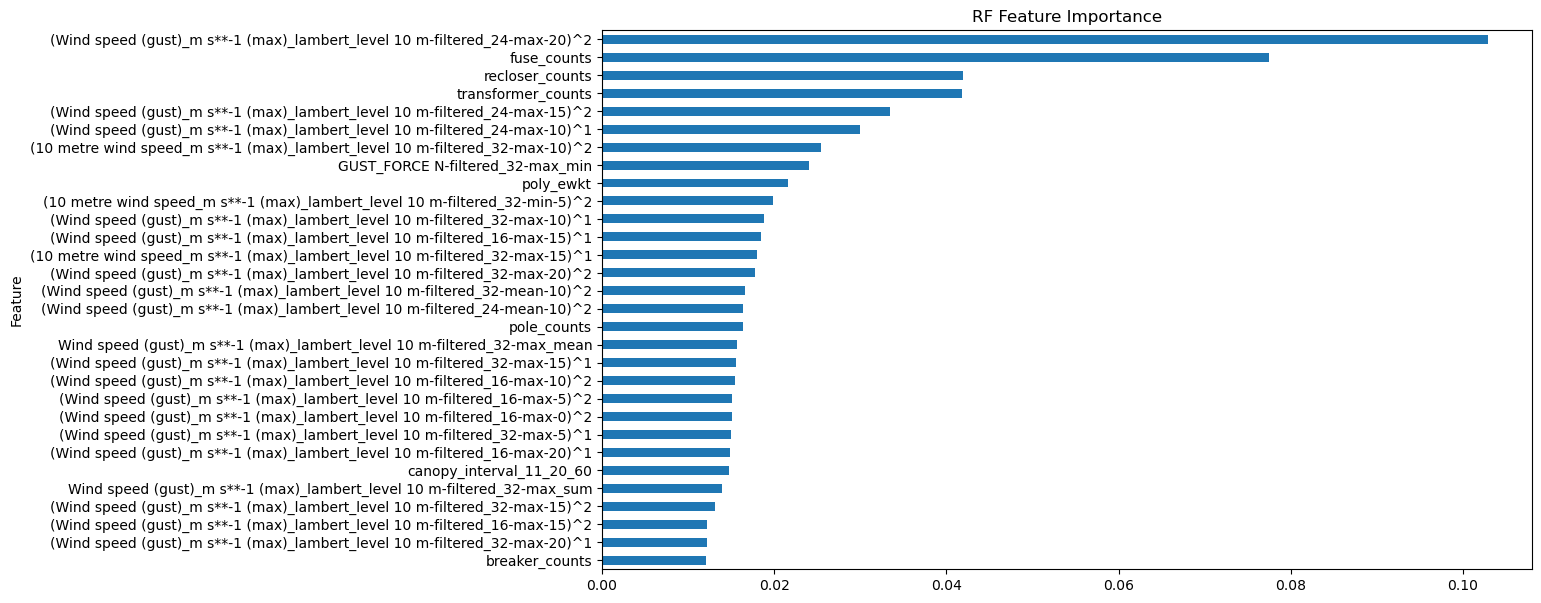

In [ ]:
top_feats = 30
ranking = calc_feature_importances(rf_model,X.columns,top_feats)